In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import nibabel as nib
import glob
from pathlib import Path
from sklearn.cluster import KMeans

In [2]:
pickle.format_version

'4.0'

In [26]:
!ls | grep

usage: grep [-abcDEFGHhIiJLlmnOoqRSsUVvwxZ] [-A num] [-B num] [-C[num]]
	[-e pattern] [-f file] [--binary-files=value] [--color=when]
	[--context[=num]] [--directories=action] [--label] [--line-buffered]
	[--null] [pattern] [file ...]


In [32]:
Path(os.getcwd()).rglob(*)

SyntaxError: invalid syntax (2909015531.py, line 1)

In [43]:
def get_file_paths(file_ext = 'img', ipath = '../raw_data/OASIS1/OAS1_RAW'):
    '''retrieve all file paths(*.img)'''
#     for i in !ls:
#         if i < 10:
#             subject_no = '000' + str(i)
#         elif i < 100:
#             subject_no = '00' + str(i)
#         else :
#             subject_no = '0'+str(i)
#         path = ipath + f'OAS1_
    full_path = []
    for subject in os.listdir(ipath):
        for p in Path(f'{ipath}/{subject}/RAW').rglob("*."+file_ext):
            full_path.append(str(p))
        
    return full_path

In [34]:
os.listdir('../raw_data/OASIS1/OAS1_RAW')

['OAS1_0303_MR1',
 'OAS1_0317_MR1',
 'OAS1_0101_MR1',
 'OAS1_0115_MR1',
 'OAS1_0129_MR1',
 'OAS1_0368_MR2',
 'OAS1_0075_MR1',
 'OAS1_0061_MR1',
 'OAS1_0049_MR1',
 'OAS1_0288_MR1',
 'OAS1_0156_MR2',
 'OAS1_0277_MR1',
 'OAS1_0263_MR1',
 'OAS1_0262_MR1',
 'OAS1_0289_MR1',
 'OAS1_0060_MR1',
 'OAS1_0074_MR1',
 'OAS1_0114_MR1',
 'OAS1_0316_MR1',
 'OAS1_0302_MR1',
 'OAS1_0314_MR1',
 'OAS1_0300_MR1',
 'OAS1_0328_MR1',
 'OAS1_0116_MR1',
 'OAS1_0102_MR1',
 'OAS1_0062_MR1',
 'OAS1_0076_MR1',
 'OAS1_0260_MR1',
 'OAS1_0274_MR1',
 'OAS1_0249_MR1',
 'OAS1_0275_MR1',
 'OAS1_0261_MR1',
 'OAS1_0395_MR2',
 'OAS1_0077_MR1',
 'OAS1_0063_MR1',
 'OAS1_0088_MR1',
 'OAS1_0103_MR1',
 'OAS1_0117_MR1',
 'OAS1_0236_MR2',
 'OAS1_0329_MR1',
 'OAS1_0301_MR1',
 'OAS1_0315_MR1',
 'OAS1_0339_MR1',
 'OAS1_0311_MR1',
 'OAS1_0305_MR1',
 'OAS1_0113_MR1',
 'OAS1_0107_MR1',
 'OAS1_0098_MR1',
 'OAS1_0067_MR1',
 'OAS1_0073_MR1',
 '.DS_Store',
 'OAS1_0150_MR2',
 'OAS1_0259_MR1',
 'OAS1_0265_MR1',
 'OAS1_0271_MR1',
 'OAS1_0270_MR

In [16]:
for i in range(15):
    if i < 10:
        subject_no = '000' + str(i)
    elif i < 100:
        subject_no = '00' + str(i)
    else :
        subject_no = '0'+str(i)

0000
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014


In [46]:
def get_plane_img_df(file_ext = 'img',
                     ipath = '../raw_data/OASIS1/OAS1_RAW',
                     plane = 'sag',
                     no_rows = -1):
    '''
    Get image dataframe.
    '''
    full_path = get_file_paths(file_ext, ipath)
    full_path.sort()
    
    if no_rows == -1:
        number = len(full_path)
    else:
        number = no_rows
    
    file_lists = []
    for i in full_path[:number]:
        if plane == 'sag':
            img = nib.load(i).get_fdata()[:,:,64]
            x = img.shape[0]
            y = img.shape[1]
            img_re = img.reshape(x * y, 1)
            km16 = KMeans(n_clusters=16).fit(img_re)
            km16_compressed = np.array(km16.cluster_centers_[km16.labels_])
            img_comp = km16_compressed.reshape(x, y, 1)#.astype('uint8')
            file_lists.append([i, plane, img_comp])
                
        elif plane == 'cor':
            img = nib.load(i).get_fdata()[128,:,:]
            x = img.shape[0]
            y = img.shape[1]
            img_re = img.reshape(x * y, 1)
            km16 = KMeans(n_clusters=16).fit(img_re)
            km16_compressed = np.array(km16.cluster_centers_[km16.labels_])
            img_comp = km16_compressed.reshape(x, y, 1)#.astype('uint8')
            file_lists.append([i, plane, img_comp])
                
        elif plane == 'tra':
            img = nib.load(i).get_fdata()[:,128,:]
            x = img.shape[0]
            y = img.shape[1]
            img_re = img.reshape(x * y, 1)
            km16 = KMeans(n_clusters=16).fit(img_re)
            km16_compressed = np.array(km16.cluster_centers_[km16.labels_])
            img_comp = km16_compressed.reshape(x, y, 1)#.astype('uint8')
            file_lists.append([i, plane, img_comp])
                
    file_df = pd.DataFrame(file_lists, columns = ['full_path', 'plane', 'image'])
    
    return file_df

In [47]:
sag_imgs = get_plane_img_df()

In [48]:
cor_imgs = get_plane_img_df(plane = 'cor')

In [49]:
tra_imgs = get_plane_img_df(plane = 'tra')

In [50]:
oas1_imgs = pd.concat([sag_imgs, cor_imgs, tra_imgs]).sort_values(by = 'full_path')


In [51]:
oas1_imgs

,full_path,plane,image
0,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,sag,"[[[0.5154299782434464], [0.5154299782434464], ..."
0,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,tra,"[[[2.5832182687200884], [2.5832182687200884], ..."
0,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,cor,"[[[1.329497907949758], [1.329497907949758], [1..."
1,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,sag,"[[[0.5554378025377105], [0.5554378025377105], ..."
1,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,tra,"[[[3.3319162503985353], [3.3319162503985353], ..."
...,...,...,...
1686,../raw_data/OASIS1/OAS1_RAW/OAS1_0457_MR1/RAW/...,sag,"[[[1.0834559696178871], [1.0834559696178871], ..."
1686,../raw_data/OASIS1/OAS1_RAW/OAS1_0457_MR1/RAW/...,cor,"[[[4.7824937810945585], [4.7824937810945585], ..."
1687,../raw_data/OASIS1/OAS1_RAW/OAS1_0457_MR1/RAW/...,cor,"[[[4.9299623115578015], [4.9299623115578015], ..."
1687,../raw_data/OASIS1/OAS1_RAW/OAS1_0457_MR1/RAW/...,sag,"[[[1.2608200455580914], [1.2608200455580914], ..."


In [62]:
oas1_imgs.full_path[0][46:]

'OAS1_0001_MR1_mpr-1_anon.img'

In [65]:
oas1_dict = {
    'subject_id' : [],
    'session' : [],
    'file_names' : []
}
for path in oas1_imgs.full_path:
    oas1_dict['subject_id'].append(path[28:37])
    oas1_dict['session'].append(path[38:41])
    oas1_dict['file_names'].append(path[46:])

In [66]:
oas1_dict_df = pd.DataFrame.from_dict(oas1_dict)
oas1_df = oas1_imgs.reset_index(drop = True).join(oas1_dict_df, how = 'left')

In [134]:
oas1_df.CDR.value_counts()

x    5064
Name: CDR, dtype: int64

In [79]:
oas1_df['CDR'] = 'x'

In [99]:
oas1_df.head()

,full_path,plane,image,subject_id,session,file_names,CDR
0,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,sag,"[[[0.5154299782434464], [0.5154299782434464], ...",OAS1_0001,MR1,OAS1_0001_MR1_mpr-1_anon.img,x
1,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,tra,"[[[2.5832182687200884], [2.5832182687200884], ...",OAS1_0001,MR1,OAS1_0001_MR1_mpr-1_anon.img,x
2,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,cor,"[[[1.329497907949758], [1.329497907949758], [1...",OAS1_0001,MR1,OAS1_0001_MR1_mpr-1_anon.img,x
3,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,sag,"[[[0.5554378025377105], [0.5554378025377105], ...",OAS1_0001,MR1,OAS1_0001_MR1_mpr-2_anon.img,x
4,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,tra,"[[[3.3319162503985353], [3.3319162503985353], ...",OAS1_0001,MR1,OAS1_0001_MR1_mpr-2_anon.img,x


In [70]:
oas1_data = pd.read_csv('../raw_data/OASIS1/oasis1_df.csv')

In [122]:
oas1_data.CDR.value_counts()

0    405
1    300
Name: CDR, dtype: int64

In [126]:
folder = f'{oas1_df.iloc[120].subject_id}_{oas1_df.iloc[120].session}'
oas1_data[oas1_data.Folder == folder].CDR

Series([], Name: CDR, dtype: int64)

In [138]:
oas1_data.drop(columns = 'Unnamed: 0', inplace=True)

In [146]:
oas1_data.iloc[0]

Folder                                            OAS1_0001_MR1
Dataset                                                    OAS1
Subject_ID                                                    1
MR                                                            1
n                                                             4
orient                                                      sag
image_arr     [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
CDR                                                           0
Name: 0, dtype: object

In [143]:

for i in range(len(oas1_data)):
    folder = oas1_data.iloc[i].Folder[:9]
    cdr = oas1_data.iloc[i].CDR
    oas1_df[oas1_df.subject_id == folder].CDR = cdr
    

/var/folders/jz/94btlb3535x_2tksxw15dt7c0000gn/T/ipykernel_62968/583793427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oas1_df[oas1_df.subject_id == folder].CDR = cdr


In [165]:
oas1_df['ID'] = oas1_df.apply(lambda x : x for f'{oas1_df.subject_id}_{oas1_df.session}')

SyntaxError: invalid syntax (3264575590.py, line 1)

In [169]:
oas1_df.image[0].shape, oas1_df.image[1].shape, oas1_df.image[2].shape

((256, 256, 1), (256, 128, 1), (256, 128, 1))

In [145]:
oas1_df.CDR.value_counts()

x    5064
Name: CDR, dtype: int64

In [152]:
oas1_data.groupby(by = 'Folder').CDR.sum()

Folder
OAS1_0001_MR1    0
OAS1_0002_MR1    0
OAS1_0003_MR1    3
OAS1_0010_MR1    0
OAS1_0011_MR1    0
                ..
OAS1_0453_MR1    3
OAS1_0454_MR1    3
OAS1_0455_MR1    0
OAS1_0456_MR1    0
OAS1_0457_MR1    0
Name: CDR, Length: 235, dtype: int64

In [155]:
oas1_cs = pd.read_csv('../raw_data/OASIS1/oasis_cross-sectional.csv')

In [161]:
oas1_cs

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [71]:
oas1_data.head()

,Unnamed: 0,Folder,Dataset,Subject_ID,MR,n,orient,image_arr,CDR
0,0,OAS1_0001_MR1,OAS1,1,1,4,sag,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,0
1,1,OAS1_0001_MR1,OAS1,1,1,4,cor,[[ 0 0 0 ... 0 0 0]\n [ 0 0 0 ... 0 0...,0
2,2,OAS1_0001_MR1,OAS1,1,1,4,tra,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,0
3,3,OAS1_0002_MR1,OAS1,2,1,4,sag,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,0
4,4,OAS1_0002_MR1,OAS1,2,1,4,cor,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,0


In [171]:
oas1_sag = oas1_df[oas1_df.plane == 'sag']
oas1_tra = oas1_df[oas1_df.plane == 'tra']
oas1_cor = oas1_df[oas1_df.plane == 'cor']



In [172]:
images_concat = {'concated':[]}
pad = np.zeros(shape=(256,30,1))
for i in range(len(oas1_sag)):
    img_sag = oas1_sag.image.iloc[i]
    img_cor = oas1_cor.image.iloc[i]
    img_tra = oas1_tra.image.iloc[i]
    concat = np.concatenate((img_sag, pad, img_cor, pad, img_tra), axis = 1)
    images_concat['concated'].append(concat)
    

In [181]:
oas1_concat = oas1_sag.drop(columns = ['image', 'plane']).reset_index(drop = True).join(pd.DataFrame(images_concat), how = 'outer')

In [185]:
oas1_concat.head()

,full_path,subject_id,session,file_names,CDR,ID,concated
0,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-1_anon.img,x,NaN,"[[[0.5154299782434464], [0.5154299782434464], ..."
1,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-2_anon.img,x,NaN,"[[[0.5554378025377105], [0.5554378025377105], ..."
2,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-3_anon.img,x,NaN,"[[[0.5792608212464074], [0.5792608212464074], ..."
3,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-4_anon.img,x,NaN,"[[[0.5655847677771249], [0.5655847677771249], ..."
4,../raw_data/OASIS1/OAS1_RAW/OAS1_0002_MR1/RAW/...,OAS1_0002,MR1,OAS1_0002_MR1_mpr-1_anon.img,x,NaN,"[[[0.4644631669906971], [0.4644631669906971], ..."


In [197]:
oas1_cs[oas1_cs['ID'] =='OAS1_0001_MR1'].CDR[0]

0.0

In [198]:
for i in range(len(oas1_concat)):
    row = oas1_concat.iloc[i]
    ID = f'{row.subject_id}_{row.session}'
    cdr = oas1_cs[oas1_cs['ID'] == ID].CDR.iloc[0]
    oas1_concat['CDR'].iloc[i] = cdr

In [203]:
oas1_concat.CDR.isna()

1688

In [204]:
oas1_concat.drop(columns = 'ID', inplace = True)

In [208]:
oas1_concat.dropna()

,full_path,subject_id,session,file_names,CDR,concated
0,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-1_anon.img,0.0,"[[[0.5154299782434464], [0.5154299782434464], ..."
1,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-2_anon.img,0.0,"[[[0.5554378025377105], [0.5554378025377105], ..."
2,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-3_anon.img,0.0,"[[[0.5792608212464074], [0.5792608212464074], ..."
3,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-4_anon.img,0.0,"[[[0.5655847677771249], [0.5655847677771249], ..."
4,../raw_data/OASIS1/OAS1_RAW/OAS1_0002_MR1/RAW/...,OAS1_0002,MR1,OAS1_0002_MR1_mpr-1_anon.img,0.0,"[[[0.4644631669906971], [0.4644631669906971], ..."
...,...,...,...,...,...,...
1683,../raw_data/OASIS1/OAS1_RAW/OAS1_0456_MR1/RAW/...,OAS1_0456,MR1,OAS1_0456_MR1_mpr-3_anon.img,0.0,"[[[3.6636093876450104], [3.6636093876450104], ..."
1684,../raw_data/OASIS1/OAS1_RAW/OAS1_0456_MR1/RAW/...,OAS1_0456,MR1,OAS1_0456_MR1_mpr-4_anon.img,0.0,"[[[3.776805393491543], [3.776805393491543], [3..."
1685,../raw_data/OASIS1/OAS1_RAW/OAS1_0457_MR1/RAW/...,OAS1_0457,MR1,OAS1_0457_MR1_mpr-1_anon.img,0.0,"[[[2.0749118269457085], [2.0749118269457085], ..."
1686,../raw_data/OASIS1/OAS1_RAW/OAS1_0457_MR1/RAW/...,OAS1_0457,MR1,OAS1_0457_MR1_mpr-2_anon.img,0.0,"[[[1.0834559696178871], [1.0834559696178871], ..."


In [213]:
oas1_concat.dropna(inplace=True)

In [216]:
oas1_concat.reset_index(drop = True, inplace=True)

In [222]:
oas1_concat.CDR = oas1_concat.CDR.apply(lambda x : 1 if x > 0 else 0)

In [223]:
oas1_concat.CDR.value_counts()

0    526
1    387
Name: CDR, dtype: int64

In [224]:
oas1_concat.head()

,full_path,subject_id,session,file_names,CDR,concated
0,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-1_anon.img,0,"[[[0.5154299782434464], [0.5154299782434464], ..."
1,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-2_anon.img,0,"[[[0.5554378025377105], [0.5554378025377105], ..."
2,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-3_anon.img,0,"[[[0.5792608212464074], [0.5792608212464074], ..."
3,../raw_data/OASIS1/OAS1_RAW/OAS1_0001_MR1/RAW/...,OAS1_0001,MR1,OAS1_0001_MR1_mpr-4_anon.img,0,"[[[0.5655847677771249], [0.5655847677771249], ..."
4,../raw_data/OASIS1/OAS1_RAW/OAS1_0002_MR1/RAW/...,OAS1_0002,MR1,OAS1_0002_MR1_mpr-1_anon.img,0,"[[[0.4644631669906971], [0.4644631669906971], ..."


In [225]:
oas1_concat_file = open("oas1_concat_df","wb")
pickle.dump(oas1_concat,oas1_concat_file)

In [229]:
oas1_concat_file = open("../raw_data/OASIS1/oas1_concat_df","rb")
banana = pickle.load(oas1_concat_file)

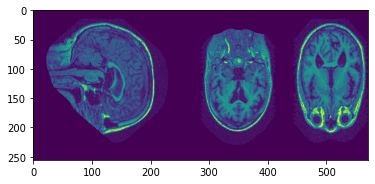

In [232]:
plt.imshow(banana.head().concated[0])